In [6]:
%autosave 0
require(ggplot2)
require(data.table)

In [24]:
# If experiment parameters change, modify this function
AddParametersAsColumns <- function(df, folderName) {
    expParams <- strsplit(folderName, "_")[[1]]
    df$groupSizeDist <- expParams[10]
    df$placementDist <- expParams[11]
    df$numColocateHosts <- expParams[12]
    df$algorithm <- expParams[16]
    df$numBitmaps <- expParams[17]
    df$numLeafsPerBitmap <- expParams[18]
    df$redundancyPerBitmap <- expParams[19]
    return(df)
}


# Turns all files of a given filname across a set of folders into a single dataset
DatasetAsDataTable <- function(filename, folders, headers) {
    # Get list of data.frames
    dfList <- lapply(folders, function(folder) {
           tmp <- read.table(paste(folder, filename, sep="/"), sep=",", header=FALSE)
           tmp <- AddParametersAsColumns(tmp, folder)
    })
    
    # Combine into a single data.table
    dt <- data.table(do.call(rbind, dfList))
    
    # Rename columns according to headers
    for (colIndex in seq(1, length(headers))) {
        setnames(dt, colnames(dt)[colIndex], headers[colIndex])
    }
    return(dt)
}

setwd('/mnt/sdb1/baseerat/numerical-evals/logs-100K-random')
folders <- Sys.glob("optimizer*")
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [25]:
rulesForAllLeaves <- DatasetAsDataTable("rules_for_all_leafs.csv", folders, c("leafId", "numRules"))

In [27]:
groupCountForAllTenants <- DatasetAsDataTable("group_count_for_all_tenants.csv", folders, c("tenantId", "groupCount"))

In [28]:
groupSizesForAllTenants <- DatasetAsDataTable("group_sizes_for_all_tenants.csv", folders, c("groupId", "groupSize"))

In [47]:
vmCountForAllTenants <- DatasetAsDataTable("vm_count_for_all_tenants.csv", folders, c("tenantId", "vmCount"))

In [48]:
head(rulesForAllLeaves)
head(groupCountForAllTenants)
head(groupSizesForAllTenants)
head(vmCountForAllTenants)

leafId,numRules,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap
0,1000,uniform,colocate-random-random,24,exact-match,10,1,0
1,1000,uniform,colocate-random-random,24,exact-match,10,1,0
2,1000,uniform,colocate-random-random,24,exact-match,10,1,0
3,1000,uniform,colocate-random-random,24,exact-match,10,1,0
4,1000,uniform,colocate-random-random,24,exact-match,10,1,0
5,1000,uniform,colocate-random-random,24,exact-match,10,1,0


tenantId,groupCount,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap
0,34,uniform,colocate-random-random,24,exact-match,10,1,0
1,8,uniform,colocate-random-random,24,exact-match,10,1,0
2,13,uniform,colocate-random-random,24,exact-match,10,1,0
3,10,uniform,colocate-random-random,24,exact-match,10,1,0
4,21,uniform,colocate-random-random,24,exact-match,10,1,0
5,17,uniform,colocate-random-random,24,exact-match,10,1,0


groupId,groupSize,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap
0,103,uniform,colocate-random-random,24,exact-match,10,1,0
1,107,uniform,colocate-random-random,24,exact-match,10,1,0
2,91,uniform,colocate-random-random,24,exact-match,10,1,0
3,124,uniform,colocate-random-random,24,exact-match,10,1,0
4,29,uniform,colocate-random-random,24,exact-match,10,1,0
5,176,uniform,colocate-random-random,24,exact-match,10,1,0


tenantId,vmCount,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap
0,186,uniform,colocate-random-random,24,exact-match,10,1,0
1,47,uniform,colocate-random-random,24,exact-match,10,1,0
2,74,uniform,colocate-random-random,24,exact-match,10,1,0
3,55,uniform,colocate-random-random,24,exact-match,10,1,0
4,119,uniform,colocate-random-random,24,exact-match,10,1,0
5,97,uniform,colocate-random-random,24,exact-match,10,1,0


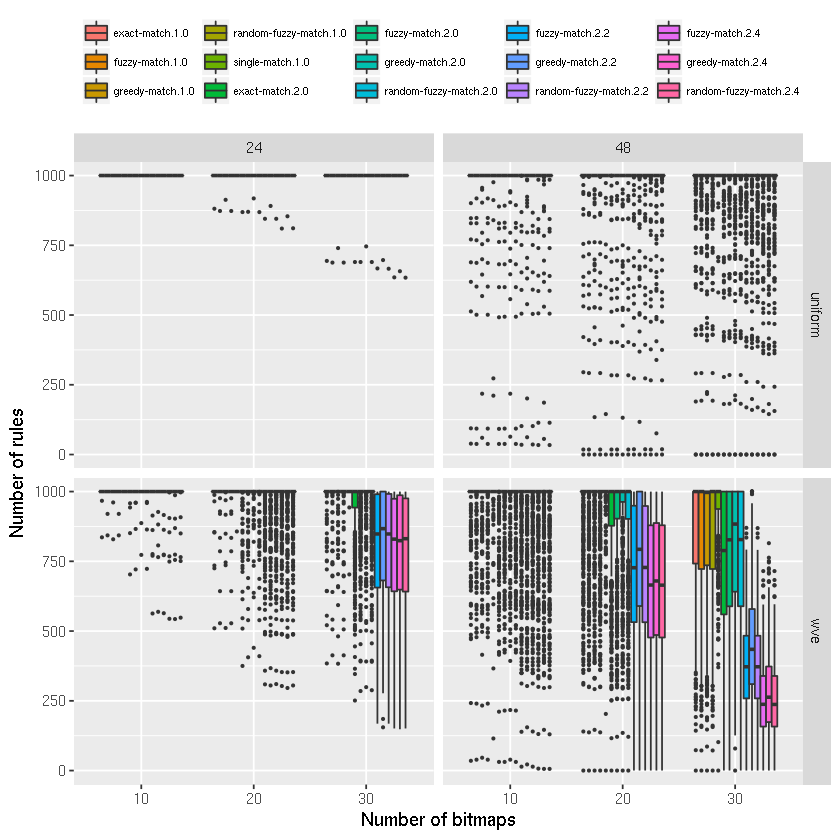

In [29]:
ggplot(rulesForAllLeaves) +
   geom_boxplot(aes(y=numRules, x=factor(numBitmaps), 
                    fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
                outlier.size=0.5) +
   facet_grid(groupSizeDist ~ numColocateHosts) +
   xlab("Number of bitmaps") +
   ylab("Number of rules") +
   plotTheme

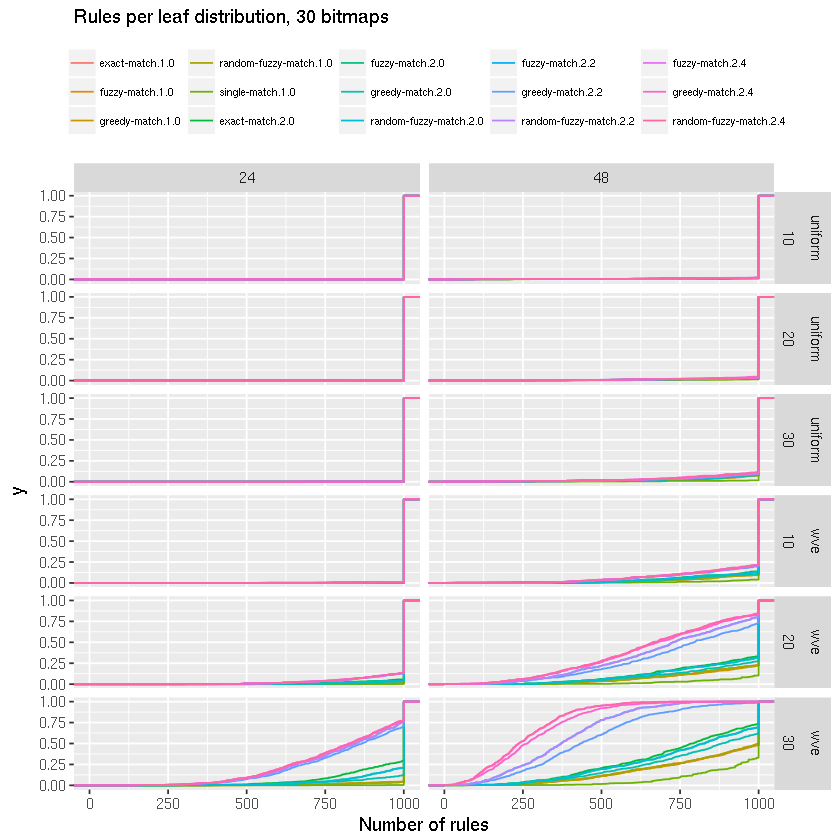

In [30]:
ggplot(rulesForAllLeaves) +
   stat_ecdf(aes(x=numRules, col=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
   facet_grid(groupSizeDist * numBitmaps ~ numColocateHosts) +
   ggtitle("Rules per leaf distribution, 30 bitmaps") +
   xlab("Number of rules") +
   plotTheme

In [53]:
groupCountForAllTenants[algorithm == "exact-match" & numColocateHosts == 24 & numBitmaps == 10 & numLeafsPerBitmap == 1,
                       quantile(groupCount, c(0.0, 0.5,0.99,0.999,0.9999,1.0)), by=list(groupSizeDist)]

groupSizeDist,V1
uniform,1.0000
uniform,18.0000
uniform,512.2400
uniform,901.0150
uniform,918.4002
uniform,919.0000
wve,1.0000
wve,18.0000
wve,512.2400
wve,901.0150


In [51]:
groupSizesForAllTenants[algorithm == "exact-match" & numColocateHosts == 24 & numBitmaps == 10 & numLeafsPerBitmap == 1,
                       quantile(groupSize,c(0.0, 0.5,0.99,0.999,0.9999,1.0)), by=list(groupSizeDist)]

groupSizeDist,V1
uniform,5.000
uniform,143.000
uniform,4258.000
uniform,4837.467
uniform,4976.149
uniform,4997.000
wve,5.000
wve,12.000
wve,387.000
wve,4695.000


In [55]:
vmCountForAllTenants[algorithm == "exact-match" & groupSizeDist == "wve" & 
                     numColocateHosts == 24 & numBitmaps == 10 & numLeafsPerBitmap == 1,
                       quantile(vmCount,c(0.0, 0.5,0.99,0.999,0.9999,1.0))]

0%      50%      99%    99.9%   99.99%     100% 
  10.000   98.000 2785.330 4902.078 4995.101 4999.000